In [1]:
import sys
sys.path.append("../") 

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, data_home='../data',cache=True,as_frame=False)
X=X/255.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

In [4]:
import numpy as np
from hamiltonian import utils

num_examples,num_inputs=X_train.shape
num_outputs=len(np.unique(y_train))

#y_train=utils.one_hot(y_train,num_outputs)
#y_test=utils.one_hot(y_test,num_outputs)

In [5]:
y_train=np.int32(y_train)
y_test=np.int32(y_test)

In [22]:

import mxnet as mx
from mxnet import nd, autograd, gluon


model_ctx=mx.gpu()
par={'weights':nd.random_normal(shape=(num_inputs,num_outputs),ctx=model_ctx),'bias':nd.random_normal(shape=num_outputs,ctx=model_ctx)}
hyper={'alpha':nd.array(20.0, ctx=model_ctx)}

In [23]:
mx.gpu()

gpu(0)

In [24]:
from hamiltonian.inference.sgd import sgd
from hamiltonian.models.softmax import softmax

model=softmax(hyper,ctx=model_ctx)
inference=sgd(model,par,step_size=0.05,ctx=model_ctx)

In [25]:
import importlib
import hamiltonian
importlib.reload(hamiltonian.models.softmax)
importlib.reload(hamiltonian.inference.sgd)

<module 'hamiltonian.inference.sgd' from '../hamiltonian/inference/sgd.py'>

In [26]:
par,loss=inference.fit(epochs=10,batch_size=64,gamma=0.9,X_train=X_train,y_train=y_train,verbose=True)

 10%|█         | 1/10 [00:04<00:41,  4.56s/it]

loss: 0.1143


 20%|██        | 2/10 [00:08<00:35,  4.49s/it]

loss: 0.0651


 30%|███       | 3/10 [00:13<00:31,  4.45s/it]

loss: 0.0456


 40%|████      | 4/10 [00:17<00:26,  4.45s/it]

loss: 0.0355


 50%|█████     | 5/10 [00:22<00:22,  4.43s/it]

loss: 0.0296


 60%|██████    | 6/10 [00:26<00:17,  4.43s/it]

loss: 0.0259


 70%|███████   | 7/10 [00:30<00:13,  4.39s/it]

loss: 0.0233


 80%|████████  | 8/10 [00:35<00:08,  4.39s/it]

loss: 0.0214


 90%|█████████ | 9/10 [00:39<00:04,  4.39s/it]

loss: 0.0200


100%|██████████| 10/10 [00:43<00:00,  4.40s/it]

loss: 0.0189


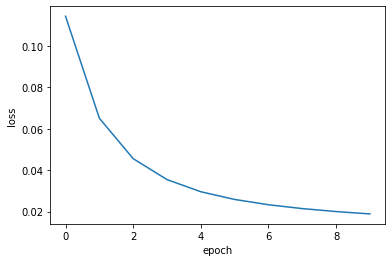

In [27]:
import matplotlib.pyplot as plt

plt.plot(loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [28]:
y_pred=model.predict(par,nd.array(X_test,ctx=model_ctx))

In [56]:
y_pred.sample().shape

(14000,)

In [57]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred.sample().asnumpy()))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1425
           1       0.88      0.88      0.88      1566
           2       0.74      0.74      0.74      1458
           3       0.72      0.72      0.72      1459
           4       0.73      0.75      0.74      1345
           5       0.62      0.59      0.61      1205
           6       0.84      0.81      0.82      1377
           7       0.78      0.76      0.77      1437
           8       0.62      0.66      0.64      1346
           9       0.66      0.67      0.66      1382

    accuracy                           0.75     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.75      0.75      0.75     14000



In [50]:
X_batch=nd.array(X_train[:32])
y_batch=nd.array(y_train[:32])

In [36]:
like=model.negative_log_likelihood(par,X_train=X_batch,y_train=y_batch)
prior=model.negative_log_prior(par)

In [37]:
like


[328.5955]
<NDArray 1 @cpu(0)>

In [38]:
prior


[-2.6213992]
<NDArray 1 @cpu(0)>

In [ ]:
like+prior